In [2]:
from pyspark.sql import SQLContext
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

sqlContext = SQLContext(sc)

In [3]:
def get_data(mins):
    now = int(time.time()) - 60 # Make "now" one minute ago
    min_ago = now - (mins * 60)
    # The call below creates the Spark DAG (Directed Acyclic Graph) on the cluster
    return sqlContext.read.load(format = "au.com.d2dcrc.carbon.spark.tweets", startTimestamp = min_ago, endTimestamp = now)

In [4]:
df = get_data(60)

In [5]:
body_texts = df.map(lambda row: row.data).map(lambda data: json.loads(data)).map(lambda tweet_as_json: tweet_as_json.get('body')).take(100)

In [6]:
#body_texts

{ "#tag": {
        "occurrences": 2234,
        "metrics": [{"Adelaide": 234}]
    }.
  "#tag2" : {
        
    }
}

set()

In [7]:
tag=body_texts[0]
tag

'James Roberts. #Bronxnation #BBTID https://t.co/zjx5aDIL2R'

In [8]:
import re
re.findall(r"#(\w+)",body_texts[1])


[]

In [9]:
def extract_hash_tags(s):
    ans=set(part[1:] for part in s.split() if part.startswith('#'))
    if len(ans)>0:
        return ans
    #return {s.strip("#") for tag in s.split() if s.startswith("#")}!

In [10]:
for tweet in body_texts:
    print(extract_hash_tags(tweet))
    #extract_hash_tags(tweet)

{'BBTID', 'Bronxnation'}
None
{'BuyBeAlrightOniTunes'}
None
None
None
None
None
None
None
None
None
None
None
None
{'espionage', 'Encryption'}
None
None
None
None
{'melbourne'}
None
None
{'servers', 'hardware', 'hp', 'refurbish'}
None
None
None
None
None
None
None
None
None
None
{'flickr'}
None
{'DRU', 'dominos', 'TenNews'}
{'auspol'}
{'auspol'}
{'BestFanArmy', '5SOSFam', 'iHeartAwards'}
None
None
None
None
None
None
None
None
None
None
{'marriageequality', 'safeschools'}
None
None
None
{'semiconductors', 'coatings', 'SmartLab', 'XRD'}
None
None
{'Madonna'}
None
None
None
None
None
None
None
{'UTSWriting'}
{'auspol'}
None
None
{'BonusBet'}
None
{'writing', 'amwriting'}
{'BonusBet'}
None
None
None
{'Mellivia', 'Scandal'}
{'au…', 'safeschools'}
None
None
None
None
None
{'RebelHeartTour', 'UnapolegeticBitch'}
None
{'gorditohermoso', 'cachorro', 'instalikes', 'i…', 'puppy'}
{'QandA'}
{'iartg', 'kindle', 'scifi'}
None
None
{'whitesandsswim'}
{'Fiddlesticks', 'Follies.'}
{"Brisbane's", 'Sout

In [11]:
h_tags = []
for t in body_texts:
    for word in t.split():
        if word.startswith('#'):
            h_tags.append(word[1:])

h_tags

['Bronxnation',
 'BBTID',
 'BuyBeAlrightOniTunes',
 'Encryption',
 'espionage',
 'melbourne',
 'servers',
 'hp',
 'refurbish',
 'hardware',
 'flickr',
 'dominos',
 'DRU',
 'TenNews',
 'auspol',
 'auspol',
 '5SOSFam',
 'BestFanArmy',
 'iHeartAwards',
 'safeschools',
 'marriageequality',
 'SmartLab',
 'XRD',
 'semiconductors',
 'coatings',
 'Madonna',
 'UTSWriting',
 'auspol',
 'BonusBet',
 'writing',
 'amwriting',
 'BonusBet',
 'Mellivia',
 'Scandal',
 'safeschools',
 'au…',
 'RebelHeartTour',
 'UnapolegeticBitch',
 'gorditohermoso',
 'cachorro',
 'instalikes',
 'puppy',
 'i…',
 'QandA',
 'kindle',
 'scifi',
 'iartg',
 'whitesandsswim',
 'Fiddlesticks',
 'Follies.',
 "Brisbane's",
 'SouthBrisbane',
 'WestEnd',
 'DOODLE',
 'Friday']

In [12]:
for word in h_tags:
       print ('%s\t%s' % (word, 1))

Bronxnation	1
BBTID	1
BuyBeAlrightOniTunes	1
Encryption	1
espionage	1
melbourne	1
servers	1
hp	1
refurbish	1
hardware	1
flickr	1
dominos	1
DRU	1
TenNews	1
auspol	1
auspol	1
5SOSFam	1
BestFanArmy	1
iHeartAwards	1
safeschools	1
marriageequality	1
SmartLab	1
XRD	1
semiconductors	1
coatings	1
Madonna	1
UTSWriting	1
auspol	1
BonusBet	1
writing	1
amwriting	1
BonusBet	1
Mellivia	1
Scandal	1
safeschools	1
au…	1
RebelHeartTour	1
UnapolegeticBitch	1
gorditohermoso	1
cachorro	1
instalikes	1
puppy	1
i…	1
QandA	1
kindle	1
scifi	1
iartg	1
whitesandsswim	1
Fiddlesticks	1
Follies.	1
Brisbane's	1
SouthBrisbane	1
WestEnd	1
DOODLE	1
Friday	1


In [13]:
import matplotlib.pyplot as plt
import collections,sys,math 
taghisto = collections.Counter(h_tags)
taghisto = [list(x) for x in sorted(taghisto.items(), key=lambda x: -x[1])]

# normalize everything to percentages, and get uncertainties
ntweets = float(len(body_texts))
# Loop over histogram bins
for ibin in range(len(taghisto)):
    # The poisson uncertainty is the square root of counts for each tag
    uncertainty = math.sqrt(taghisto[ibin][1])
    # Set counts to a percentage of total tweets in which tag occurs
    taghisto[ibin][1]= 100.*taghisto[ibin][1]/ntweets
    # Same for the uncertainty
    taghisto[ibin].append(100.*uncertainty/ntweets)

# Return just the histogram information
#return taghisto
#taghisto

In [14]:
bodyT = df.map(lambda row: row.data).map(lambda data: json.loads(data)).map(lambda tweet_as_json: tweet_as_json.get('body'))


In [15]:
#counts = text_file.flatMap(lambda line: line.split(" ")) \
#             .map(lambda word: (word, 1)) \
#             .reduceByKey(lambda a, b: a + b)


# Spark

In [16]:
def get_data_hourly(hr):
    smins = hr*60
    emins = (hr+1)*60
    now = int(time.time()) # take current time
    ehour_ago = now - (smins * 60)
    shour_ago = now - (emins * 60)
    # The call below creates the Spark DAG (Directed Acyclic Graph) on the cluster
    return sqlContext.read.load(format = "au.com.d2dcrc.carbon.spark.tweets", startTimestamp = shour_ago, endTimestamp = ehour_ago)

In [17]:
df = get_data_hourly(1)

In [18]:
rawDF = df.select("data")

In [19]:
type(rawDF)
tweet_bodies = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data)).map(lambda tweet_as_json: tweet_as_json.get('body'))
#.map(lambda line: line.split(" ")).map(lambda word: filter(word.startswith('#'))) 

In [20]:
hash_tags =tweet_bodies.flatMap(lambda line: line.split(" ")) \
.filter(lambda word: word.startswith('#'))

hashtag_counts = hash_tags.map(lambda hashtag: (hashtag, 1)).reduceByKey(lambda a, b: a + b)

#.map(lambda word: word.startswith('#')).take(2)
#temp.map(lambda line: line.split(" ")).map(lambda word: set(filter(word.startswith('#'))))

for (word, count) in HTagCounts:
        print("%s: %i" % (word, count))

In [21]:
from collections import Counter
word_counts = Counter(words)
top_three = word_counts.most_common(3)
print(top_three)

NameError: name 'words' is not defined

In [22]:
Tags=hash_tags.take(5)
Tags

['#weather', '#safeschools', '#Madonna', '#GOTYA2015', '#staytuned']

In [23]:
hashtag_counts.take(10)

[('#justsaying', 1),
 ('#instagood', 1),
 ('#ROHLTD', 1),
 ('#KPRS', 8),
 ('#idiots', 1),
 ('#BelugaSolar', 3),
 ('#LoveOzYA', 1),
 ('#Sikorsky', 1),
 ('#stories', 9),
 ('#designing', 2)]

In [24]:
htags = hashtag_counts.take(200)
type(htags)
from collections import Counter
Counter(dict(htags)).most_common(10)

[('#fairgofairfax', 141),
 ('#PurposeTour', 62),
 ('#Trump', 31),
 ('#ipadgames,', 16),
 ('#CUFIWatchman', 15),
 ('#stories', 9),
 ('#Indigenous', 8),
 ('#KPRS', 8),
 ('#Survival', 7),
 ('#free', 6)]

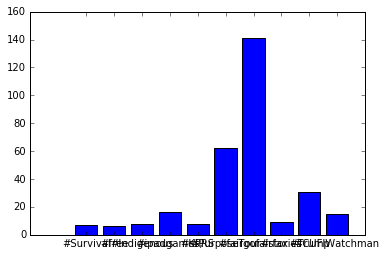

In [25]:
import matplotlib.pyplot as plt
#type(dict(htags))
d=dict(Counter(dict(htags)).most_common(10))
#type(d)

%matplotlib inline
plt.bar(range(len(d)), d.values(), align="center")
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

In [315]:
tweet_bodies = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data)).map(lambda tweet_as_json: tweet_as_json.get('body'))
#.map(lambda line: line.split(" ")).map(lambda word: filter(word.startswith('#')))

In [10]:
#import string
#PUNCTUATION = set(string.punctuation)

#for i in range(len(htags)):
    #word=htags[i][0]
    #print(word)
    #newWord = "#"+''.join([letter for letter in word if not letter in PUNCTUATION])
    #print(newWord)
    #htags[i][0] = 
    #htags[i][0].replace(htags[i][0],newWord)

In [16]:
#type(rawDF)
def explode_hashtag(hashtag_list):
    hashtags = list()
    
    for hashtag in hashtag_list:
        text = hashtag.get('text').lower()
        if text is not None:
            hashtags.append(text)
        
    return hashtags


tweetTest = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data)).filter(lambda line: 'location' in line)\
.map(lambda line: (line['location']['country_code'],line['twitter_entities']['hashtags'],line.get('body')))\
.map(lambda line_tuple: (line_tuple[0], explode_hashtag(line_tuple[1]), line_tuple[2]))

#tweetTest.take(1)


In [14]:
def get_posted_hour(postedTime):
        temp = postedTime.split(":")
        posted_hour = temp[0][-2:]
        return posted_hour

In [94]:
#postedT = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data)).filter(lambda line: 'location' in line)\
#.map(lambda line: (line.get('postedTime')))

#postedT.map(lambda line_tuple: (get_posted_hour(line_tuple[0]))).take(2)


['22', '22']

In [240]:
#sample[0][2][0].get('text')
#sample = tweetTest.take(10)
#sample[:10]

In [19]:
sparkDF = sqlContext.createDataFrame(tweetTest,['location','hashtags','body'])
#newDF = sparkDF.withColumn('timeframe', sparkDF.hashtags)
#newDF.printSchema()
#newDF.show()
sparkDF
#sparkDF.select(explode(sparkDF.col('hashtags')).alias("anHashtag"))
#sparkDF.take(10)

DataFrame[location: string, hashtags: array<string>, body: string]

In [20]:
sparkDF.na.drop(how='any').show()

+--------------------+--------------------+--------------------+
|            location|            hashtags|                body|
+--------------------+--------------------+--------------------+
|           Australia|                  []|@khanadeelali اے ...|
|       United States|                  []|Late night haircu...|
|           Australia|               [csg]|We can talk all w...|
|       United States|                  []|@FoxNews I don't ...|
|           Australia|[cannabis, stoner...|Stoner Sloth is a...|
|           Australia|                  []|@jenthinksharder ...|
|           Australia| [youtube, musicbiz]|"People want to h...|
|           Australia|[summer, cricket,...|#summer #cricket ...|
|           Australia|[internationallyi...|@VanityVonGlow @C...|
|       United States|                  []|I'm at Los Angele...|
|           Australia|                  []|Chromecast so con...|
|           Australia|                  []|I can AnimeLab st...|
|           Australia|   

In [257]:
#def get_hashtags(rddBody):
    #sparkDF.map(lambda r: r.body)
    #return rddBody.flatMap(lambda line: line.split(" ")).filter(lambda word: word.startswith('#'))

#get_hashtags(sparkDF.map(lambda r: r.body))

PythonRDD[247] at RDD at PythonRDD.scala:43

In [21]:
#tags = sparkDF.flatMap(lambda r: r.hashtags).map(lambda d: "," + d.get('text','none'))
#tags.take(10)
#sparkDF.select(explode(sparkDF.hashtags).alias("anHashtag"))
from pyspark.sql.functions import *
sparkDF = sparkDF.select('*',explode(sparkDF.hashtags).alias("anHash"))
#sparkDF.take(10)

In [22]:
sparkDF.show()

+---------+--------------------+--------------------+--------------------+
| location|            hashtags|                body|              anHash|
+---------+--------------------+--------------------+--------------------+
|Australia|               [csg]|We can talk all w...|                 csg|
|Australia|[cannabis, stoner...|Stoner Sloth is a...|            cannabis|
|Australia|[cannabis, stoner...|Stoner Sloth is a...|         stonersloth|
|Australia|[cannabis, stoner...|Stoner Sloth is a...|              auspol|
|Australia| [youtube, musicbiz]|"People want to h...|             youtube|
|Australia| [youtube, musicbiz]|"People want to h...|            musicbiz|
|Australia|[summer, cricket,...|#summer #cricket ...|              summer|
|Australia|[summer, cricket,...|#summer #cricket ...|             cricket|
|Australia|[summer, cricket,...|#summer #cricket ...|               bbl05|
|Australia|[internationallyi...|@VanityVonGlow @C...|internationallyig...|
|Australia|[international

In [108]:
sparkDF.describe('location','anHash').show()

+-------+--------+--------------------+
|summary|location|              anHash|
+-------+--------+--------------------+
|  count|     929|                 929|
|   mean|    null|                 1.0|
| stddev|    null|                 0.0|
|    min|Adelaide|             12for12|
|    max| Wyoming|เก็บโหมดเศร้าใส่ถ...|
+-------+--------+--------------------+



In [43]:
#sparkDF.stat.crosstab('location','anHash').show()
sparkDF.stat.freqItems(['location','anHash'], 0.9).show()

+------------------+----------------+
|location_freqItems|anHash_freqItems|
+------------------+----------------+
|   [Mountain View]|      [Veterans]|
+------------------+----------------+



In [40]:
from pyspark.sql.functions import struct
freq = sparkDF.withColumn('loc_hash', struct('location', 'anHash')).stat.freqItems(['loc_hash'], 0.9)
freq.take(3)

[Row(loc_hash_freqItems=[Row(location='Mountain View', anHash='Veterans')])]

In [23]:
sparkDF.groupBy(sparkDF['location'],sparkDF['anHash']).count().sort('count', ascending=False).show()

+--------------+---------------+-----+
|      location|         anHash|count|
+--------------+---------------+-----+
|     Australia|  senateinquiry|   26|
|     Australia|    williamtown|   26|
|     Australia|         auspol|   24|
|     Australia|     nowplaying|   15|
|     Australia|         sydney|   11|
|     Australia|   penaltyrates|    8|
|     Australia|      melbourne|    8|
|     Australia|     victraffic|    8|
|     Australia|      australia|    7|
|     Australia|      bbcdebate|    6|
|     Australia|         trndnl|    6|
|     Australia|      christmas|    6|
|     Australia|      abcnews24|    6|
|     Australia|           whys|    6|
|     Australia|        bzbooks|    6|
|     Australia|      firealarm|    5|
|     Australia|aussiedolanteam|    5|
|United Kingdom|         megans|    5|
|     Australia|thisisaustralia|    5|
|     Australia|          perth|    5|
+--------------+---------------+-----+
only showing top 20 rows



In [54]:
sparkDF.registerTempTable("eventTable")
#sqlContext.sql("SELECT location, anHash AS 'Hash',COUNT(*) FROM eventTable GROUP BY location").show()
tablePlot = sqlContext.sql("SELECT location, anHash,count(*) as count FROM eventTable GROUP BY location,anHash ORDER BY count DESC")

In [24]:
def top_10_hashes(loc,dataframe):
    dataframe.registerTempTable("hashtagTable")
    ans = sqlContext.sql("SELECT anHash as hashtag, count FROM \
                            (SELECT location, anHash,count(*) as count \
                            FROM hashtagTable GROUP BY location,anHash ORDER BY count DESC) as t \
                            WHERE t.location='"+loc+"' LIMIT 10")
    return ans
    
#top_10_hashes('Sydney',sparkDF).show()

In [25]:
top_10_hashes('Australia',sparkDF).show()

+-------------+-----+
|      hashtag|count|
+-------------+-----+
|  williamtown|   26|
|senateinquiry|   26|
|       auspol|   24|
|   nowplaying|   15|
|       sydney|   11|
|   victraffic|    8|
| penaltyrates|    8|
|    melbourne|    8|
|    australia|    7|
|       trndnl|    6|
+-------------+-----+



In [96]:
def plot_top10_hashes(city,spDF):
    dd = top_10_hashes(city,spDF)
    ddPanda = dd.toPandas()
    ddPanda.plot("hashtag",kind='bar',color='gray',title='Top 10 hashtags for '+city,legend=False)

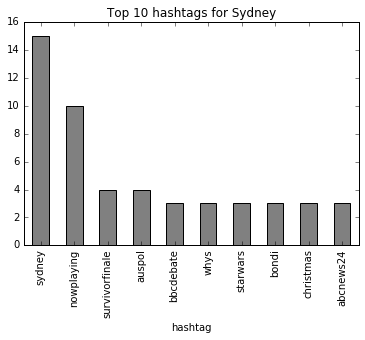

In [97]:
plot_top10_hashes('Sydney',sparkDF)

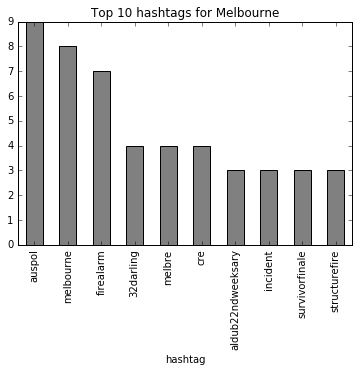

In [98]:
plot_top10_hashes('Melbourne',sparkDF)

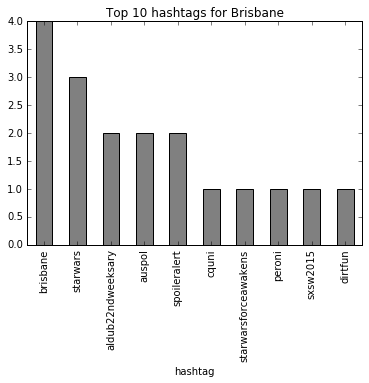

In [99]:
plot_top10_hashes('Brisbane',sparkDF)

In [80]:
def top_10_hashes(loc,dataframe):
    dataframe.registerTempTable("hashtagTable")
    Sydney = sqlContext.sql("SELECT location, anHash as hashtag, count(*) as count \
                            FROM hashtagTable \
                            GROUP BY location,anHash \
                            HAVING location='"+loc+"'\
                            ORDER BY count DESC \
                            LIMIT 10")
    Sydney.show()
    
top_10_hashes('Sydney',sparkDF)

+--------+-----------------+-----+
|location|          hashtag|count|
+--------+-----------------+-----+
|  Sydney|       nowplaying|   13|
|  Sydney|           auspol|    8|
|  Sydney|           Sydney|    6|
|  Sydney|           sydney|    6|
|  Sydney|      naturalGold|    4|
|  Sydney|         skincare|    4|
|  Sydney|OrganicRosehipOil|    4|
|  Sydney|       cosmetique|    4|
|  Sydney|  TheForceAwakens|    4|
|  Sydney|        cosmetics|    4|
+--------+-----------------+-----+



In [28]:
top10_hour = tablePlot.toPandas()
top10_hour

,location,anHash,count
0,Sydney,nowplaying,324
1,Ghan,trndnl,271
2,Sydney,Sydney,179
3,Pinjarra,EvasHolidayGiveaway,138
4,Sydney,ALDUB5thMonthsary,120
5,Melbourne,auspol,109
6,Sydney,sydneystorm,104
7,Sydney,sydney,102
8,Melbourne,PTSD,95
9,Melbourne,EndoSisters,95


In [43]:
#summary = sqlContext.sql("SELECT sum(count) as tweets_for_hour, avg(count) as avg_tweets_per_hour FROM (SELECT location, count(*) as count  FROM eventTable GROUP BY location)inner_q")
summary = sqlContext.sql("SELECT * FROM (SELECT location, count(*) as count  FROM eventTable GROUP BY location)inner_q")
summary.show()

+--------------------+-----+
|            location|count|
+--------------------+-----+
|           Mount Isa|    3|
|      Bondi Junction|    2|
|              Cyprus|    1|
|Salamander Bay - ...|    3|
|             Mildura|    2|
|              Lindos|   12|
|             Salford|    1|
|       Murray Bridge|    8|
|         Fredericton|    1|
|      Rancho Cordova|    2|
|             Cardiff|    5|
|Kyoto City Nakagy...|    9|
|           Lafayette|    1|
|            Inkerman|    1|
|          Wollongong|   49|
|Ocean Grove - Bar...|    6|
|The Art Institute...|    1|
|             Bohumín|    5|
|             Geelong|   44|
|         Nogata City|    5|
+--------------------+-----+
only showing top 20 rows



In [41]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import andrews_curves
%matplotlib inline
plt.figure()


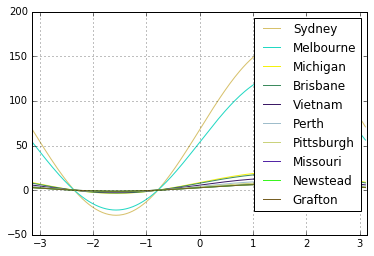

In [169]:
andrews_curves(data[:10], 'location')

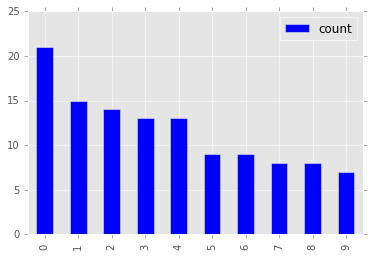

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
LHdata[:10].plot(ax=ax, kind='bar')

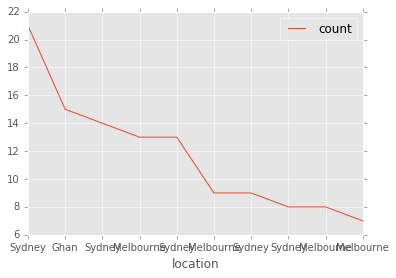

In [70]:
LHdata[:10].plot("location")

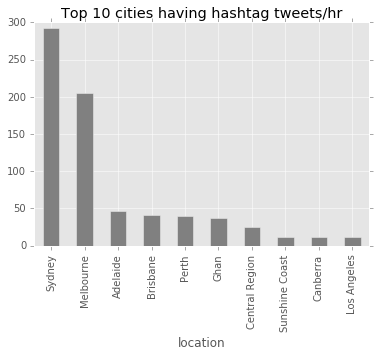

In [93]:
data[:10].plot("location",kind='bar',stacked=True,color='gray',title='Top 10 cities having hashtag tweets/hr',legend=False)

import plotly.plotly as py
import cufflinks as cf
import pandas as pd

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/widgets/master/ipandas-examples/311_150k.csv', parse_dates=True, index_col=1)
#df.head(3)

series = LHdata[:10]
series.head(3)

series.iplot(kind='bar', yTitle='Number of Complaints', title='NYC 311 Complaints',
             filename='cufflinks/categorical-bar-chart')


In [76]:
D=LHdata[:10]
D

,location,anHash,count
0,Sydney,sydneystorm,21
1,Ghan,trndnl,15
2,Sydney,Sydney,14
3,Melbourne,auspol,13
4,Sydney,nowplaying,13
5,Melbourne,CrawfordTo1Million,9
6,Sydney,ALDUB5thMonthsary,9
7,Sydney,sydney,8
8,Melbourne,CRE,8
9,Melbourne,HighStPrahran,7


In [42]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas.tools.rplot as rplot
%matplotlib inline
plt.figure()
#plot = rplot.RPlot(D)
#plot.add(rplot.TrellisGrid(['location','.']))
#plot.add(rplot.GeomScatter())
#plot.add(rplot.GeomPolyFit(degree=2))
#plot.render(plt.gcf())

import seaborn as sns
g = sns.FacetGrid(LHdata[:10], row="location")
g.map(plt.scatter, "anHash", "count")

In [81]:
test = sqlContext.sql("SELECT location, anHash FROM eventTable")
ptest = test.toPandas()
#ptest

In [15]:
from datetime import datetime, timedelta
d = datetime.now()

#data = [d + timedelta(minutes=i) for i in range(100)]
k = d + timedelta(minutes=+(d.minute % 60)) 
k, d

(datetime.datetime(2015, 12, 17, 17, 58, 58, 948212),
 datetime.datetime(2015, 12, 17, 16, 59, 58, 948212))

In [34]:
import pandas as pd
PandaDF = pd.DataFrame(columns=['hashtag','count','timeframe'])
PandaDF['hashtag']=['nowplaying','sydney','aldubthesearch','livingutilities','tgif','nowplaying','sydney','christmas','starwars','auspol']
PandaDF['count']=[13,13,7,2,2,13,7,4,4,4]
PandaDF['timeframe']=[0,0,1,1,2,2,3,3,4,4]
PandaDF

,hashtag,count,timeframe
0,nowplaying,13,0
1,sydney,13,0
2,aldubthesearch,7,1
3,livingutilities,2,1
4,tgif,2,2
5,nowplaying,13,2
6,sydney,7,3
7,christmas,4,3
8,starwars,4,4
9,auspol,4,4


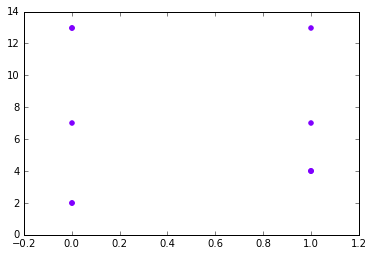

In [28]:
import matplotlib.cm as cm
import numpy as np
#for i, group in PandaDF.groupby('timeframe'):
    #plt.figure()
    #group.plot(x='count', y='timeframe', title=str(i))
    #plt.figure()   
colors = iter(cm.rainbow(np.linspace(0, 1,10)))

fig, ax = plt.subplots()
ax.scatter(PandaDF['timeframe'],PandaDF['count'],color=next(colors))

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


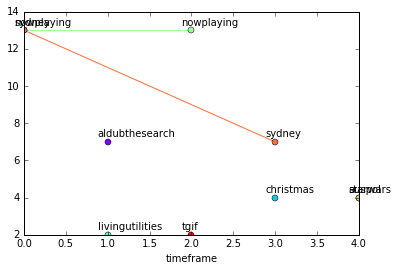

In [35]:
import matplotlib.cm as cm
import numpy as np
fig, ax = plt.subplots()

grouped = PandaDF.groupby('hashtag')

colors = iter(cm.rainbow(np.linspace(0, 1, len(grouped))))

for key, group in grouped:
    group.plot(ax=ax, x='timeframe', y='count',label=key,marker='o',color=next(colors),linestyle='-',legend=False)
    #print(group['timeframe'])
    #ax.annotate(group['hashtag'], xy=(group['timeframe'], group['count']))
    
#ax.legend(loc='upper right',ncol=3,fontsize=8,numpoints=1)

for i, txt in enumerate(PandaDF['hashtag']):
    ax.annotate(txt,xy=(PandaDF['timeframe'][i],PandaDF['count'][i]),xytext = (-10,5),textcoords = 'offset points',)
    
plt.show()

13 0
13 0
7 0
2 0
2 0
13 1
7 1
4 1
4 1
4 1


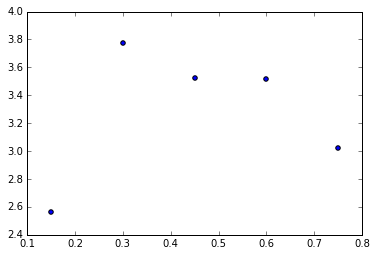

In [33]:
y=[2.56422, 3.77284,3.52623,3.51468,3.02199]
z=[0.15, 0.3, 0.45, 0.6, 0.75]
n=[58,651,393,203,123]

fig, ax = plt.subplots()
ax.scatter(z, y,marker='o')

for i, txt in enumerate(PandaDF['hashtag']):
    #ax.annotate(txt, (z[i],y[i]))
    #print(z[i],y[i])
    print(PandaDF['count'][i],PandaDF['timeframe'][i])


In [133]:
def annotate_df(row):  
    ax.annotate(row.name, row.values,
                xytext=(10,-5), 
                textcoords='offset points',
                size=18, 
                color='darkslategrey')

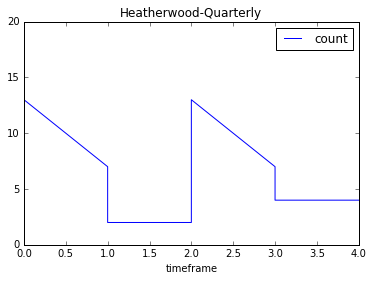

In [101]:
import matplotlib.dates as mdates

ax3=PandaDF.plot('timeframe','count')
ax3.set_ylim(0,20)
ax3.set_title('Heatherwood-Quarterly')

In [ ]:
#df = issue_counts.unstack()
#rows = np.random.choice(df.index.values, 15)
#df = df.ix[rows]
#df.plot(kind='bar', stacked=True, figsize=(20, 10), colormap="BuGn")
#ax = .plot(kind='bar', stacked=True, width = 0.5, figsize=(18, 10), colormap="YlGnBu")
#ax.legend(bbox_to_anchor=(0.98, 1.0))
ax.set_ylabel("Number of Issues")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

###################################
import matplotlib.pyplot as plt
%matplotlib inline

#df = tt.unstack()
#ax = finalP.plot(kind='bar',x='timeframe', y='hashtag',figsize=(30,10), colormap="gray")
#ax.set_ylabel("Number of Hashtags")
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='best')
#ax.legend(bbox_to_anchor=(0.16, 0.98))

In [ ]:
text1=['***UNION or NON UNION submissions***\nMust be registered with Central Casting\n\nKendall is taking submissions for a... http://t.co/g9tKTO6hHP',
 'RT @Snowden: I was told to stop tweeting cat pictures. This is a protest. The cat pictures will continue until morale improves.  https://t.…',
 'RT @Finance_Fan: Video: Undercover Israeli soldiers infiltrate Palestinian demonstration, beat protesters and shoot detain... http://t.co/e…',
 'Video Game voice actors vote yes in regards to being able to start a strike.\n#GameNews #Gaming #Voiceacting\nhttp://t.co/UTU838u4wY',
 '@da_667 @threat_inc @TalosSecurity Aye, the tales of the mercenaries of the Talos have traveled to the far reaches of the western border.']
text2='***UNION or NON UNION submissions***\nMust be registered with Central Casting\n\nKendall is taking submissions for a... http://t.co/g9tKTO6hHP'
#sentences=sent_tokenize(text1)
#my_text=[sent for sent in text1 if 'protest' in word_tokenize(sent)]

def get_bodytext(body_list):
    my_text=list()
    for sent in body_list:
        #print(word_tokenize(sent.lower()))
        if 'the' in  word_tokenize(sent.lower()):
            #print(sent)
            my_text.append(sent.lower())
    #print(my_text)       
    return my_text

def get_tweet(body_line):
    #my_text=list()
    if 'central' in  word_tokenize(body_line.lower()):
        print(body_line)
        #return body_line

# Part II

In [36]:
from pyspark.sql import SQLContext
import datetime as dt
import time
import json
import nltk
sqlContext = SQLContext(sc)

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [65]:
def load_data():
    day = dt.datetime(2015,10,10)
    day_ago = day - dt.timedelta(days=1)
    
    end_time = time.mktime(day.timetuple())
    start_time = time.mktime(day_ago.timetuple())
    
    return sqlContext.read.load(format = "au.com.d2dcrc.carbon.spark.tweets", startTimestamp = int(start_time), endTimestamp = int(end_time))

In [2]:
def get_data(hrs):
    time_now = dt.datetime.now()
    hour_ago = time_now - dt.timedelta(hours=hrs)
    #print(time_now,hour_ago)

    end_time = time.mktime(time_now.timetuple())
    start_time = time.mktime(hour_ago.timetuple())
    #print(start_time,end_time)
    
    return sqlContext.read.load(format = "au.com.d2dcrc.carbon.spark.tweets", startTimestamp = int(start_time), endTimestamp = int(end_time))


In [3]:
#df = load_data()
df = get_data(hrs=1)
rawDF = df.select("data")

In [15]:
body_text = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data))\
.filter(lambda line_tuple: 'en' in line_tuple['twitter_lang']).map(lambda line:(line.get('body',None), line.get('twitter_lang',None)))
#.filter(lambda line_tuple: 'en' in line_tuple['actor']['languages']).map(lambda line:line.get('body'))
#.map(lambda line: (line.get('body'),line['actor']['languages']))


In [17]:
body_text.count()

51251

In [5]:
body_tokens = body_text.map(lambda line: tweet_tokenizer.tokenize(line))

In [15]:
body_tokens.take(2)

[['@justwalkingaway',
  'not',
  'needed',
  '.',
  'You',
  '’',
  'll',
  'be',
  'ok',
  '.',
  'You',
  'don',
  '’',
  't',
  'do',
  'half',
  'and',
  'half',
  ',',
  'you',
  'commit',
  'to',
  'the',
  'short',
  'or',
  'the',
  'long',
  '.',
  'Have',
  'faith',
  'in',
  'your',
  'commitment'],
 ['RT',
  '@mary_blando',
  ':',
  'Wow',
  'fantastic',
  'c',
  'bibi',
  '!',
  '!',
  '#ALDUBMyOneAndONLY',
  'https://t.co/jXdqeiarn0']]

In [6]:
#for bendigo data taken from Oct 10, 2015
body_text = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data)).map(lambda line: line.get('body'))\
.filter(lambda line_tuple: "bendigo" in line_tuple.lower())

In [221]:
body_text.take(3)

['YouTube Interviews President Obama after the State of the Union... https://t.co/zbbefw5ZmL #stateoftheunion2016',
 "Me in school: GIVE ME LIBERTY OR GIVE ME DEATH!!!!!! Mainly liberty please cause like I'm too young to die *does smile and gives thumbs up*",
 'RT @MinhKular: LNP will NOT rule out GST.....accusing Labor of scare campaign.\nOnly scare around is LNP and their GST\n\n#auspol']

In [77]:
def tokenize_tweet(tweet):
    return tweet_tokenizer.tokenize(tweet)


tokenize_tweet("@foo #bar :) lol twitter #funny @bar")

['@foo', '#bar', ':)', 'lol', 'twitter', '#funny', '@bar']

In [32]:
body_links = body_text.map(lambda line: tweet_tokenizer.tokenize(line)).flatMap(lambda x: x).filter(lambda x: "http" in x)
body_links.count()

244

In [23]:
body_tokens = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data)).map(lambda line: line.get('body'))\
.filter(lambda line_tuple: "bendigo" in line_tuple.lower()).map(lambda line: tweet_tokenizer.tokenize(line))

In [35]:
import string 

PUNCTUATION = set(string.punctuation)
STOPWORDS = set(stopwords.words('english'))
STEMMER = PorterStemmer()

def feature_extraction(tokens):
    lowercased = [t.lower() for t in tokens]
    no_punctuation = []
    for word in lowercased:
        punct_removed = ''.join([letter for letter in word if not letter in PUNCTUATION])
        no_punctuation.append(punct_removed)
    no_stopwords = [w for w in no_punctuation if not w in STOPWORDS]
    stemmed = [STEMMER.stem(w) for w in no_stopwords]
    no_links = [w for w in stemmed if (not 'http' in w) and len(w)>2]
    return [w for w in no_links if w]

In [26]:
twitter_features = body_tokens.map(lambda token_list: {"features":feature_extraction(token_list),"populationGroup":0})

In [28]:
twitter_features.count()

56457

In [248]:
#body_text = rawDF.map(lambda row: row.data).map(lambda data: json.loads(data))\
#.filter(lambda line_tuple: 'location' in line_tuple).map(lambda line: line.get('body'))
aa=twitter_features.map(lambda l: (l['features'],l['populationGroup']))
sparkDF = sqlContext.createDataFrame(aa,['feature','population'])

In [249]:
sparkDF.show()

+--------------------+----------+
|             feature|population|
+--------------------+----------+
|[youtub, intervie...|         0|
|[school, give, li...|         0|
|[rt, minhkular, l...|         0|
|[look, forward, a...|         0|
|[rt, k1erri, awes...|         0|
|[rt, cloydriv, ob...|         0|
|[link, httpstcozl...|         0|
|[rt, nbcnightlyne...|         0|
|[rt, poemsporn, h...|         0|
|[rt, thotari, u, ...|         0|
|[harryshannon, de...|         0|
|[pursu, freelanc,...|         0|
|[rt, islandmagta,...|         0|
|[girlcallederin, ...|         0|
|[rt, poempost, yo...|         0|
|[cyborg, children...|         0|
|[deal, doctor, st...|         0|
|[rt, aronftaylor,...|         0|
|[rt, cloydriv, ob...|         0|
|[rt, bradybuzz, i...|         0|
+--------------------+----------+
only showing top 20 rows



In [209]:
test_tweet_hashed = twitter_features.map(lambda line: LabeledPoint(line['populationGroup'], htf.transform(line['article'])))

In [5]:
bendigo_tweet=body_text.take(5)

In [8]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokns=[tokenizer.tokenize(line)for line in bendigo_tweet]
#tokns
tagged = [nltk.pos_tag(word) for word in tokns]
#tagged
#entities = nltk.chunk.ne_chunk(tagged)

# Naive Bayes

In [192]:
data =[
    {"text": "not to eat too much is not enough to lose weight enough", "category": 1},
    {"text": "Russia is trying to invade Ukraine", "category": 2},
    {"text": "do not neglect exercise", "category": 1},
    {"text": "Syria is the main issue, Obama says", "category": 2},
    {"text": "eat to lose weight", "category": 1},
    {"text": "you should not eat much", "category": 1}
]

#data =[
#    {"text": "not to eat too much is not enough to lose weight", "category": "health"},
#    {"text": "Russia is trying to invade Ukraine", "category": "politics"},
#    {"text": "do not neglect exercise", "category": "health"},
#    {"text": "Syria is the main issue, Obama says", "category": "politics"},
#    {"text": "eat to lose weight", "category": "health"},
#    {"text": "you should not eat much", "category": "health"}
#]
#{"text": "From: USERNAME@leland.Stanford.EDU (USER NAME)\nSubject: When does Fred McGriff of the Padres become a free agent?\nOrganization: DSG, Stanford University, CA 94305, USA\nLines: 1\n\n\n", "label_name": "rec.sport.baseball", "label": 9}

In [30]:
train = [('I love this sandwich.', 'pos'),
    ('this is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('this is my best work.', 'pos'),
    ("what an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('he is my sworn enemy!', 'neg'),
    ('my boss is horrible.', 'neg')]

test = [('the beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')]

In [5]:
n = json.dumps(data)  
dataj=json.loads(n)
#rdd_train = sc.parallelize(dataj)
#data_raw=rdd_train.map(lambda line: json.loads(line))

In [7]:
data_pared=sc.parallelize(dataj)

In [14]:
data_cleaned = data_pared.map(lambda category, text: (category, tokenize(text)))

In [200]:
data_cleaned = sc.parallelize(dd)

In [173]:
data_hashed = data_cleaned.map(lambda category, text: LabeledPoint(category, htf.transform(text)))
train_hashed, test_hashed = data_hashed.randomSplit([0.7, 0.3])

In [181]:
LabeledPoint(1, htf.transform(text_tokn))

LabeledPoint(1.0, (500,[9,24,65,89,106,195,238,273,302,319,406,409,437,447,451,472],[1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0]))

In [207]:
label_point=list()
for sdict in dd:
    #print(sdict.get('text'))
    #print(LabeledPoint(sdict['category'],htf.transform(sdict['text'])))
    label_point.append(LabeledPoint(sdict['category'],htf.transform(sdict['text'])))

In [209]:
label_point_data = sc.parallelize(label_point)

In [211]:
label_point_data.first()

LabeledPoint(1.0, (500,[43,111,338,340,459],[1.0,1.0,1.0,1.0,2.0]))

In [212]:
train_hashed, test_hashed = label_point_data.randomSplit([0.7, 0.3])

In [225]:
train_hashed.take(3)

[LabeledPoint(2.0, (500,[24,39,304,440],[1.0,1.0,1.0,1.0])),
 LabeledPoint(1.0, (500,[43,111,340],[1.0,1.0,1.0])),
 LabeledPoint(1.0, (500,[43,338],[1.0,1.0]))]

In [221]:
test_hashed.take(1)

[LabeledPoint(1.0, (500,[43,111,338,340,459],[1.0,1.0,1.0,1.0,2.0]))]

In [1]:
#model = NaiveBayes.train(label_point_data,1.0)

In [75]:
data = raw_data.map(lambda line: json.loads(line))

In [93]:
data_pared = data.map(lambda line: {'populationGroup': line['populationGroup'], 'article': line['article']})

In [119]:
#gives population and tokens
#data_cleaned = data_pared.map(lambda data_pared: (data_pared['populationGroup'], tokenize(data_pared['article'])))

In [291]:
data_cleaned = data_pared.map(lambda pared_line: {'populationGroup': lable_classes(pared_line['populationGroup']),'article':tokenize(pared_line['article'])})

In [294]:
data_hashed = data_cleaned.map(lambda dict_line: LabeledPoint(dict_line['populationGroup'], htf.transform(dict_line['article'])))

In [296]:
train_hashed, test_hashed = data_hashed.randomSplit([0.8, 0.2])

In [297]:
train_hashed.count()

374

In [298]:
test_hashed.count()

85

In [129]:
examples = [({"blue":True, "red":False},"BlueOne"), ({"blue":False,"red":True},"RedOne")] 
classifier = nltk.classify.naivebayes.NaiveBayesClassifier.train(examples)
classifier.prob_classify({"blue":True,"red":False}) 

<ProbDist with 2 samples>

In [130]:
dist = classifier.prob_classify({"blue":True,"red":False}) 

In [137]:
dist.prob("RedOne")

0.1

# Naive Bayes Classification For Populations

In [34]:
import string
import json 
import re
import nltk
import datetime as dt
import time

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from pyspark import SparkContext
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import NaiveBayes

In [31]:
#global variables for the tokenize function 
PUNCTUATION = set(string.punctuation)
STOPWORDS = set(stopwords.words('english'))
STEMMER = PorterStemmer()

# Function to break text into "tokens", lowercase them, remove punctuation and stopwords, and stem them
def tokenize(text):
    #load nltk dictionaries to cluster. temporary 
    nltk.data.path.append("/local/hdfs-volume/data/nltk_data")
    
    tokens = word_tokenize(text)
    lowercased = [t.lower() for t in tokens]
    no_punctuation = []
    for word in lowercased:
        punct_removed = ''.join([letter for letter in word if not letter in PUNCTUATION])
        no_punctuation.append(punct_removed)
    no_stopwords = [w for w in no_punctuation if not w in STOPWORDS]
    stemmed = [STEMMER.stem(w) for w in no_stopwords]
    return [w for w in stemmed if w]

In [49]:
#label classes for Naive Bayse considering education and all others
def lable_class_edu(item_pop):
    if item_pop.lower() == "education":
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

#label classes for Naive Bayse considering general population and all others
def lable_class_gen(item_pop):
    if "general" in item_pop.lower():
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

#label classes for Naive Bayse considering legal and all others
def lable_class_leg(item_pop):
    if "legal" in item_pop.lower():
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

#label classes for Naive Bayse considering ethnic and all others
def lable_class_eth(item_pop):
    if "ethnic" in pop_item.lower():
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

#label classes for Naive Bayse considering religious and all others
def lable_class_reli(item_pop):
    if "religious" in item_pop.lower():
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

#label classes for Naive Bayse considering media and all others
def lable_class_reli(item_pop):
    if "media" in item_pop.lower():
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

#label classes for Naive Bayse considering media and all others
def lable_class_reli(item_pop):
    if re.compile('agricul[tural|ture]').match(item_pop.lower()):
        item_pop = 1
    else:
        item_pop = 2
    return item_pop

In [3]:
#label classes for Naive Bayse considering multiple targets
def lable_classes(pop_item):
    #population = pop_item.lower()
    if "education" in pop_item.lower():
        pop_item = 1
    elif "general" in pop_item.lower():
        pop_item = 2
    elif "legal" in pop_item.lower():
        pop_item = 3
    elif re.compile('bus[iness|siness]').match(pop_item.lower()):
        pop_item = 4
    elif re.compile('eth[nic|ic]').match(pop_item.lower()):
        pop_item = 5
    elif "medical" in pop_item.lower():
        pop_item = 6  
    elif "religious" in pop_item.lower():
        pop_item = 7  
    elif re.compile('agricul[tural|ture]').match(pop_item.lower()):
        pop_item = 8
    elif re.compile('lab[or|our]').match(pop_item.lower()):
        pop_item = 9
    elif "media" in pop_item.lower():
        pop_item = 10
    return pop_item

In [1]:
#for item in populations:
    #a = lable_classes(item)
    #print(a)

In [4]:
#load gsr web article data
#raw_data = sc.textFile("hdfs:///gsr.json") #includes months data 
raw_data = sc.textFile("hdfs:///gsr3.json") #only english
#raw_data.take(2)

In [5]:
#load json
data = raw_data.map(lambda line: json.loads(line))
#data.take(2)

In [6]:
#extract intrested features, population group and article content
data_pared = data.map(lambda line: {'populationGroup': line['populationGroup'], 'article': line['article']})
#populations = data_pared.map(lambda l: l['populationGroup']).collect()
data_pared.count()

236

In [58]:
general_class = data_pared.filter(lambda line: 'general' in line['populationGroup'].lower()).count()
general_class

108

In [9]:
edu_class = data_pared.filter(lambda line: 'education' in line['populationGroup'].lower()).count()
edu_class

10

In [69]:
ethnic_class = balancedData.filter(lambda line: 'eth' in line['populationGroup'].lower()).count()
ethnic_class

76

In [10]:
labour_class = data_pared.filter(lambda line: 'lab' in line['populationGroup'].lower()).count()
labour_class

88

In [71]:
media_class = balancedData.filter(lambda line: 'media' in line['populationGroup'].lower()).count()
media_class

0

In [72]:
legal_class = data_pared.filter(lambda line: 'legal' in line['populationGroup'].lower()).count()
legal_class

0

In [73]:
business_class = balancedData.filter(lambda line: 'business' in line['populationGroup'].lower()).count()
business_class

85

In [74]:
medical_class = balancedData.filter(lambda line: 'medical' in line['populationGroup'].lower()).count()
medical_class

63

In [75]:
reli_class = balancedData.filter(lambda line: 'religious' in line['populationGroup'].lower()).count()
reli_class

24

In [76]:
agri_class = balancedData.filter(lambda line: 'agri' in line['populationGroup'].lower()).count()
agri_class

46

In [62]:
data_pared.filter(lambda line: 'general' not in line['populationGroup'].lower())\
.filter(lambda line: 'lab' not in line['populationGroup'].lower()).count()

40

In [64]:
genaralSample = data_pared.filter(lambda line: 'general' in line['populationGroup'].lower())
labourSample = data_pared.filter(lambda line: 'lab' in line['populationGroup'].lower())
genaralSample.union(labourSample).count()

196

In [11]:
minorityFraction = labour_class / float(edu_class)

genaralSample = data_pared.filter(lambda line: 'general' in line['populationGroup'].lower())
labourSample = data_pared.filter(lambda line: 'lab' in line['populationGroup'].lower())
MajoritySample = genaralSample.union(labourSample)

MinoritySample = data_pared.filter(lambda line: 'general' not in line['populationGroup'].lower())\
.filter(lambda line: 'lab' not in line['populationGroup'].lower()).sample(withReplacement=True, fraction=minorityFraction)

balancedData = MajoritySample.union(MinoritySample)
balancedData.count()

564

In [12]:
#assign numerical lables to population groups and tokenized article text
#data_cleaned = data_pared.map(lambda pared_line: {'populationGroup': lable_classes(pared_line['populationGroup']),'article':tokenize(pared_line['article'])})
data_cleaned = balancedData.map(lambda pared_line: {'populationGroup': lable_classes(pared_line['populationGroup']),'article':tokenize(pared_line['article'])})

In [13]:
data_cleaned.count()

564

In [14]:
#vectorize the hash with 50k features. Determines the size of a sparse vector
htf = HashingTF(50000)

In [85]:
data_hashed = data_cleaned.map(lambda dict_line: LabeledPoint(dict_line['populationGroup'], htf.transform(dict_line['article'])))

In [54]:
#data_hashed.take(3)

In [21]:
from pyspark.mllib.feature import IDF

In [42]:
def transform(document):
    #tf.take(2)
    idf = IDF().fit(tf)
    tfidf = idf.transform(tf)
    return tfidf

In [51]:
data_htf = data_cleaned.map(lambda dict_line: (dict_line['populationGroup'], htf.transform(dict_line['article'])))

In [62]:
data_htf.map(lambda l:l[1])

PythonRDD[64] at RDD at PythonRDD.scala:43

In [50]:
data_hashed.take(1)

[(2,
  SparseVector(50000, {37: 1.0, 135: 1.0, 206: 3.0, 906: 1.0, 1365: 1.0, 4906: 1.0, 5469: 1.0, 5536: 1.0, 5870: 1.0, 6163: 2.0, 6328: 5.0, 6775: 1.0, 7467: 1.0, 8167: 1.0, 8582: 2.0, 8962: 1.0, 9036: 2.0, 9218: 1.0, 9628: 1.0, 9939: 1.0, 10064: 1.0, 11394: 1.0, 11546: 1.0, 11583: 1.0, 11649: 1.0, 11739: 1.0, 12072: 1.0, 13089: 1.0, 13294: 1.0, 13439: 2.0, 14862: 1.0, 16227: 1.0, 16282: 1.0, 17453: 1.0, 17498: 1.0, 17724: 1.0, 18299: 1.0, 18755: 1.0, 19056: 1.0, 19876: 2.0, 20997: 1.0, 21136: 1.0, 21162: 1.0, 22220: 1.0, 22336: 1.0, 22626: 1.0, 22660: 1.0, 22778: 1.0, 23387: 1.0, 23736: 1.0, 24150: 1.0, 24745: 1.0, 24910: 1.0, 25313: 1.0, 25601: 1.0, 26110: 1.0, 26162: 1.0, 26217: 1.0, 26482: 1.0, 26931: 1.0, 27192: 1.0, 27246: 1.0, 27539: 1.0, 27636: 1.0, 28245: 2.0, 29053: 2.0, 29516: 1.0, 29729: 1.0, 30270: 1.0, 31045: 1.0, 31103: 1.0, 31206: 1.0, 31306: 1.0, 31314: 1.0, 33415: 1.0, 33607: 1.0, 33877: 1.0, 34390: 3.0, 35518: 1.0, 35945: 1.0, 36078: 1.0, 36091: 1.0, 36260: 1.0, 3

In [31]:
tf.take(2)

[SparseVector(50000, {37: 1.0, 135: 1.0, 206: 3.0, 906: 1.0, 1365: 1.0, 4906: 1.0, 5469: 1.0, 5536: 1.0, 5870: 1.0, 6163: 2.0, 6328: 5.0, 6775: 1.0, 7467: 1.0, 8167: 1.0, 8582: 2.0, 8962: 1.0, 9036: 2.0, 9218: 1.0, 9628: 1.0, 9939: 1.0, 10064: 1.0, 11394: 1.0, 11546: 1.0, 11583: 1.0, 11649: 1.0, 11739: 1.0, 12072: 1.0, 13089: 1.0, 13294: 1.0, 13439: 2.0, 14862: 1.0, 16227: 1.0, 16282: 1.0, 17453: 1.0, 17498: 1.0, 17724: 1.0, 18299: 1.0, 18755: 1.0, 19056: 1.0, 19876: 2.0, 20997: 1.0, 21136: 1.0, 21162: 1.0, 22220: 1.0, 22336: 1.0, 22626: 1.0, 22660: 1.0, 22778: 1.0, 23387: 1.0, 23736: 1.0, 24150: 1.0, 24745: 1.0, 24910: 1.0, 25313: 1.0, 25601: 1.0, 26110: 1.0, 26162: 1.0, 26217: 1.0, 26482: 1.0, 26931: 1.0, 27192: 1.0, 27246: 1.0, 27539: 1.0, 27636: 1.0, 28245: 2.0, 29053: 2.0, 29516: 1.0, 29729: 1.0, 30270: 1.0, 31045: 1.0, 31103: 1.0, 31206: 1.0, 31306: 1.0, 31314: 1.0, 33415: 1.0, 33607: 1.0, 33877: 1.0, 34390: 3.0, 35518: 1.0, 35945: 1.0, 36078: 1.0, 36091: 1.0, 36260: 1.0, 36280: 

In [32]:
tfidf.take(2)

[SparseVector(50000, {37: 3.2458, 135: 1.541, 206: 9.123, 906: 2.6733, 1365: 4.0342, 4906: 2.4656, 5469: 1.9674, 5536: 1.6829, 5870: 3.0046, 6163: 2.0472, 6328: 15.7939, 6775: 2.2425, 7467: 3.9389, 8167: 4.0342, 8582: 1.2594, 8962: 2.8403, 9036: 1.746, 9218: 3.7719, 9628: 2.3665, 9939: 2.2593, 10064: 2.3665, 11394: 3.6978, 11546: 1.3532, 11583: 3.7719, 11649: 1.4616, 11739: 4.0342, 12072: 0.9432, 13089: 2.1472, 13294: 1.815, 13439: 3.6964, 14862: 3.0046, 16227: 4.0342, 16282: 1.3396, 17453: 1.993, 17498: 4.0342, 17724: 3.0787, 18299: 2.5756, 18755: 1.1663, 19056: 4.0342, 19876: 7.7038, 20997: 3.3411, 21136: 1.2742, 21162: 3.9389, 22220: 1.2129, 22336: 2.7533, 22626: 2.1937, 22660: 4.0342, 22778: 4.0342, 23387: 2.1321, 23736: 4.0342, 24150: 0.4233, 24745: 3.0046, 24910: 2.8711, 25313: 1.8042, 25601: 1.5165, 26110: 2.9356, 26162: 0.7609, 26217: 1.8482, 26482: 4.0342, 26931: 4.0342, 27192: 2.2097, 27246: 3.6978, 27539: 2.0193, 27636: 1.9674, 28245: 7.7038, 29053: 2.3214, 29516: 2.6479, 29

In [86]:
train_hashed, test_hashed = data_hashed.randomSplit([0.8, 0.2])

In [87]:
train_hashed.count()

457

In [88]:
test_hashed.count()

121

In [89]:
model = NaiveBayes.train(train_hashed)

In [90]:
predictionAndLabel = test_hashed.map(lambda p : (float(model.predict(p.features)), p.label))

In [47]:
#predictionAndLabel.collect()

In [59]:
correct = predictionAndLabel.filter(lambda a: a[0] == a[1])

In [91]:
accuracy = 1.0 * predictionAndLabel.filter(lambda result_line: result_line[0] == result_line[1]).count() / test_hashed.count()
accuracy

0.7768595041322314

In [ ]:
model.save(sc, "myModelPath")
sameModel = NaiveBayesModel.load(sc, "myModelPath")

========================================================================================

In [211]:
test_tweet_hashed.count()

69325

In [212]:
data_hashed.count()

236

In [213]:
model = NaiveBayes.train(data_hashed)

In [214]:
prediction_and_label = test_tweet_hashed.map(lambda p : (model.predict(p.features), p.label))

In [217]:
prediction_and_label.count()

69325

In [281]:
predicted_pop = prediction_and_label.map(lambda a: (int(a[0]),int(a[1])))
spark_predicts = sqlContext.createDataFrame(predicted_pop,['predicted','default'])
spark_predicts['predicted']

Column<b'predicted'>

In [89]:
#gen_pop = 100*prediction_and_label.filter(lambda result: result[0]==2).count()/test_tweet_hashed.count()

In [286]:
#new_sparkDF= sparkDF.join(spark_predicts['predicted'],"predictedd")

In [255]:
new_sparkDF

69325

In [21]:
feturs = train_hashed.map(lambda x: x.features)
feturs

PythonRDD[11] at RDD at PythonRDD.scala:43

In [92]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.util import MLUtils
#predictionAndLabels = sc.parallelize([(6.0, 5.0), (6.0, 6.0), (7.0, 5.0), (6.0, 5.0), (6.0, 6.0), (6.0,6.0), (6.0, 6.0), (7.0, 7.0), (7.0, 5.0)])

In [58]:
predictionAndLabels = sc.parallelize([(2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (2.0, 9.0), (2.0, 5.0), (2.0, 1.0), (2.0, 2.0), (9.0, 9.0),
 (2.0, 9.0), (2.0, 9.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (9.0, 9.0), (9.0, 9.0), (2.0, 2.0), (9.0, 9.0), (2.0, 2.0), (2.0, 2.0),
 (9.0, 9.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (9.0, 9.0), (2.0, 9.0), (9.0, 9.0), (9.0, 9.0), (2.0, 2.0), (9.0, 9.0), (2.0, 2.0),
 (2.0, 4.0), (2.0, 1.0), (2.0, 2.0), (2.0, 9.0), (9.0, 9.0), (9.0, 9.0), (2.0, 2.0), (9.0, 9.0), (9.0, 9.0), (2.0, 2.0), (9.0, 9.0),
 (2.0, 4.0), (2.0, 4.0), (9.0, 9.0), (2.0, 7.0)])

In [93]:
metrics = MulticlassMetrics(predictionAndLabel)
metrics.confusionMatrix().toArray()

array([[ 16.,   0.,   0.,   1.,   0.,   0.,   0.,   0.],
       [  4.,  17.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,  14.,   4.,   0.,   0.,   1.,   0.],
       [  5.,   0.,   0.,   8.,   0.,   0.,   0.,   0.],
       [  2.,   0.,   0.,   0.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   6.,   0.,   0.],
       [  3.,   0.,   0.,   0.,   0.,   0.,   4.,   0.],
       [  4.,   1.,   0.,   0.,   1.,   0.,   0.,  19.]])

In [94]:
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.7768595041322314
Recall = 0.7768595041322314
F1 Score = 0.7768595041322314


In [98]:
labels_test = test_hashed.map(lambda lp: lp.label).distinct().collect()
print(labels_test)
labels = data_hashed.map(lambda lp: lp.label).distinct().collect()
print(labels)

[6.0, 1.0, 7.0, 8.0, 2.0, 9.0, 4.0, 5.0]
[6.0, 1.0, 7.0, 8.0, 2.0, 9.0, 4.0, 5.0]


In [100]:
# Statistics by class
#labels = data.map(lambda lp: lp.label).distinct().collect()
for label in sorted(labels):
    print("Class %s precision = %s" % (label, metrics.precision(label)))
    print("Class %s recall = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, beta=1.0)))
    print("\n")

Class 1.0 precision = 0.47058823529411764
Class 1.0 recall = 0.9411764705882353
Class 1.0 F1 Measure = 0.627450980392157


Class 2.0 precision = 0.9444444444444444
Class 2.0 recall = 0.7727272727272727
Class 2.0 F1 Measure = 0.85


Class 4.0 precision = 1.0
Class 4.0 recall = 0.7368421052631579
Class 4.0 F1 Measure = 0.8484848484848484


Class 5.0 precision = 0.6153846153846154
Class 5.0 recall = 0.6153846153846154
Class 5.0 F1 Measure = 0.6153846153846154


Class 6.0 precision = 0.8333333333333334
Class 6.0 recall = 0.8333333333333334
Class 6.0 F1 Measure = 0.8333333333333334


Class 7.0 precision = 1.0
Class 7.0 recall = 1.0
Class 7.0 F1 Measure = 1.0


Class 8.0 precision = 0.8
Class 8.0 recall = 0.5714285714285714
Class 8.0 F1 Measure = 0.6666666666666666


Class 9.0 precision = 1.0
Class 9.0 recall = 0.76
Class 9.0 F1 Measure = 0.8636363636363636




In [11]:
from pyspark import SparkContext
sqlContext = SQLContext(sc)
from pyspark.mllib.util import MLUtils

import string
import json 
import pandas as pd

In [17]:
def load_tweets(tweets_data_path):
    
    tweets_data = []
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            #print(tweet['text'])
            tweets_data.append(tweet)
        except:
            continue
    return tweets_data
#print(tweets_data[0])

In [60]:
business_data = sc.parallelize(load_tweets("Tweets_NB/business_tweet.txt"))
agri_data = sc.parallelize(load_tweets("Tweets_NB/agri_tweet.txt"))
edu_data = sc.parallelize(load_tweets("Tweets_NB/education_tweets.txt"))
ethic_data = sc.parallelize(load_tweets("Tweets_NB/ethic_tweets.txt"))
labour_data = sc.parallelize(load_tweets("Tweets_NB/labour_tweets.txt"))
medical_data = sc.parallelize(load_tweets("Tweets_NB/medical_tweets.txt"))
religious_data = sc.parallelize(load_tweets("Tweets_NB/religious_tweets.txt"))

In [61]:
print(business_data.count(),agri_data.count(),edu_data.count(),ethic_data.count(), labour_data.count(),medical_data.count(),religious_data.count())

100 100 100 100 100 100 100


In [ ]:
#load business_tweets.txt

In [33]:
def tokenize_data(data):
    return raw_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line))

In [62]:
agri_features = agri_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":8})
business_features = business_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":4})
edu_features = edu_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":1})
ethic_features = ethic_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":5})
labour_features = labour_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":9})
medical_features = medical_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":6})
religious_features = religious_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line)).map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":7})

In [66]:
twitter_data = agri_features.union(business_features.union(edu_features.union(ethic_features.union(labour_features))))
twitter_data  = twitter_data .union(medical_features.union(religious_features))

In [47]:
tweet_tokens = raw_data.map(lambda row: row.get('text',None)).map(lambda line: tweet_tokenizer.tokenize(line))
cleaned_data1 = tweet_tokens.map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":4})
cleaned_data2 = tweet_tokens.map(lambda tokens: {"features":feature_extraction(tokens),"populationGroup":1})

In [55]:
twitter_test_data = cleaned_data1.union(cleaned_data2.union(cleaned_data1))

# RAKE

In [1]:
import string
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [3]:
#global variables for the tokenize function 
PUNCTUATION = set(string.punctuation)
STOPWORDS = set(stopwords.words('english'))
LEMMER = WordNetLemmatizer()

In [4]:
def punct_remove(tokens):
    #return len(word) == 1 and word in string.punctuation
    no_punctuation = []
    for word in tokens:
        punct_removed = ''.join([letter for letter in word if not letter in PUNCTUATION])
        no_punctuation.append(punct_removed)
    stemmed = [LEMMER.lemmatize(w) for w in no_stopwords]
    no_links = [word for word in stemmed if (not 'http' in word) and len(word)>2]
    return no_punctuation

def is_punct(word):
    if word in string.punctuation:
        return True
    else:
        return False

def is_number(word):
    try:
        float(word) if '.' in word else int(word)
        return True
    except ValueError:
        return False

In [5]:
PUNCTUATION = set(string.punctuation)
STOPWORDS = set(stopwords.words('english'))
LEMMER = WordNetLemmatizer()

def feature_extraction(tokens):
    nltk.data.path.append("/local/hdfs-volume/data/nltk_data")
    
    #lowercased = [t.lower() for t in tokens]
    no_punctuation = []
    for word in tokens:
        punct_removed = ''.join([letter for letter in word if not letter in PUNCTUATION and not letter.isdigit()])
        no_punctuation.append(punct_removed)
    no_stopwords = [w for w in no_punctuation if not w in STOPWORDS]
    #stemmed = [STEMMER.stem(w) for w in no_stopwords]
    stemmed = [LEMMER.lemmatize(w) for w in no_stopwords]
    no_links = [word for word in stemmed if (not 'http' in word) and len(word)>2]
    #return [w for w in no_links if w]
    return no_links

In [6]:
def generate_candidate_keywords(sentences):
    phrase_list = []
    for sentence in sentences:
        words = map(lambda x: "|" if x in STOPWORDS else x, nltk.word_tokenize(sentence.lower()))
    #words = map(lambda x: "|" if x in STOPWORDS else x, tweet_tokenizer.tokenize(sentences.lower()))
        phrase = []
        for word in words:
            if word == "|" or is_punct(word) or is_number(word):
                if len(phrase) > 0:
                    phrase_list.append(phrase)
                    phrase = []
            #phrase.append(word)
            else:
                phrase.append(word)
    return phrase_list

In [7]:
def generate_candidate_tweetkeywords(sentences):
    phrase_list = []
    
    tokens = tweet_tokenizer.tokenize(sentences.lower())
    #print(tokens)
    #no_punct_tweet = punct_remove(tokens)
    words = map(lambda x: "|" if x in STOPWORDS else x,tokens)
    phrase = []
    for word in words:
        #print(word)
        if word == "|" or is_punct(word):
            #print(word)
            if len(word) > 0:
                phrase_list.append(phrase)
                phrase = []
        else:
            phrase.append(word)
    print(phrase_list)    
    #return  phrase_list

In [8]:
def extract(text):
    #sentences = nltk.sent_tokenize(text)
    #phrase_list = generate_candidate_keywords(sentences)
    
    #word_scores = 
    #calculate_word_scores(phrase_list)
    
    #phrase_list =
    #generate_candidate_tweetkeywords(tweet)
    #print(phrase_list)
    
    t_words = feature_extraction(tweet_tokenizer.tokenize(tweet.lower()))
    print(t_words)
    #d = nltk.FreqDist()
    
    #for p in phrase_list:
        #print(p)
        #fd[p]+=1
    
    
    #print( word_scores)

In [13]:
text="""Compatibility of systems of linear constraints over the set of natural 
numbers. Criteria of compatibility of a system of linear Diophantine 
equations, strict inequations, and nonstrict inequations are considered. 
Upper bounds for components of 1988 a minimal set of solutions and algorithms 
of construction of minimal generating sets of solutions for all types of 
systems are given. These 565 criteria and the corresponding algorithms for 
constructing a minimal supporting set of solutions can be 70.5% used in solving 
all the considered types of systems and systems of mixed types."""

tweet='@da_667 @threat_inc @TalosSecurity Aye, the tales of the mercenaries of the Talos have traveled to the far reaches of the western border.'

texttweet=['***UNION or NON UNION submissions***\nMust be registered with Central Casting\n\nKendall is taking submissions for a... http://t.co/g9tKTO6hHP',
 'RT @Snowden: I was told to stop tweeting cat pictures. This is a protest. The cat pictures will continue until morale improves.  https://t.…',
 'RT @Finance_Fan: Video: Undercover Israeli soldiers infiltrate Palestinian demonstration, beat protesters and shoot detain... http://t.co/e…',
 'Video Game voice actors vote yes in regards to being able to start a strike.\n#GameNews #Gaming #Voiceacting\nhttp://t.co/UTU838u4wY',
 '@da_667 @threat_inc @TalosSecurity Aye, the tales of the mercenaries of the Talos have traveled to the far reaches of the western border.']

In [14]:
extract(tweet)

['threatinc', 'talossecurity', 'aye', 'tale', 'mercenary', 'talos', 'traveled', 'far', 'reach', 'western', 'border']


In [10]:
extract(tweet)

['snowden', 'told', 'stop', 'tweeting', 'cat', 'picture', 'protest', 'cat', 'picture', 'continue', 'morale', 'improves']


In [165]:
def calculate_word_scores(phrase_list):
    word_freq = nltk.FreqDist()
    word_degree = nltk.FreqDist()
    for phrase in phrase_list:
        degree = len(phrase)- 1
        #print(degree)
        for word in phrase:
            word_freq[word]+=1
            #print(word)
            #word_degree.inc(word, degree) # other words
        print(word_freq)
    #for word in word_freq.keys():
        #word_degree[word] = word_degree[word] + word_freq[word] # itself
    ## word score = deg(w) / freq(w)
    #word_scores = {}
    #for word in word_freq.keys():
        #word_scores[word] = word_degree[word] / word_freq[word]
    #return degree

In [239]:
#phraseList =[['compatibility'], ['systems'], ['linear', 'constraints'], ['set'], ['natural', 'numbers'], ['criteria'], ['compatibility']]
phraseList = tweet_tokenizer.tokenize(texttweet.lower())
fd = nltk.FreqDist()
print(phraseList)
for p in phraseList:
    #for w in p:
    fd[p]+=1
fd.most_common(2)   

['rt', '@snowden', ':', 'i', 'was', 'told', 'to', 'stop', 'tweeting', 'cat', 'pictures', '.', 'this', 'is', 'a', 'protest', '.', 'the', 'cat', 'pictures', 'will', 'continue', 'until', 'morale', 'improves', '.', 'https://t.…']


[('.', 3), ('pictures', 2)]

In [176]:
fd = nltk.FreqDist()
fd['compatibility']+=1
fd

Counter({'compatibility': 1})

In [77]:
word_list = ['video', 'game', 'voice', 'actor', 'vote', 'yes', 'regard', 'able', 'start', 'strike', 'gamenews', 'gaming', 'voiceacting']
nltk.pos_tag(word_list)


[('video', 'NN'),
 ('game', 'NN'),
 ('voice', 'NN'),
 ('actor', 'NN'),
 ('vote', 'NN'),
 ('yes', 'RB'),
 ('regard', 'VB'),
 ('able', 'JJ'),
 ('start', 'NN'),
 ('strike', 'NN'),
 ('gamenews', 'NNS'),
 ('gaming', 'VBG'),
 ('voiceacting', 'VBG')]

In [79]:
from nltk.corpus import wordnet as wn

In [91]:
for synset in wn.synsets('strike'):
    print(synset.lemma_names())
    #for lemma in synset.lemmas():
        #print(lemma.name())

['strike', 'work_stoppage']
['strike']
['rap', 'strike', 'tap']
['strike', 'ten-strike']
['strike']
['hit', 'smash', 'smasher', 'strike', 'bang']
['strike']
['affect', 'impress', 'move', 'strike']
['hit', 'strike', 'impinge_on', 'run_into', 'collide_with']
['strike', 'hit']
['strike']
['hit', 'strike']
['strike', 'walk_out']
['fall', 'shine', 'strike']
['come_to', 'strike']
['strike', 'hit']
['strike']
['fall_upon', 'strike', 'come_upon', 'light_upon', 'chance_upon', 'come_across', 'chance_on', 'happen_upon', 'attain', 'discover']
['strike']
['strike', 'scratch', 'expunge', 'excise']
['hit', 'strike', 'come_to']
['hit', 'strike']
['assume', 'take', 'strike', 'take_up']
['mint', 'coin', 'strike']
['strickle', 'strike']
['strike']
['strike']
